#1. PERKENALAN

In [ ]:
'''
Saya Rugaya Muksin BSA, saya biasa dipanggil ega. Saya merupakan salah satu 
student bootcamp data science batch 006 Hacktiv8.

Graded challenge kedua di phase 0 ini, sesuai guidlines saya akan menggunakan 
konsep gradien untuk mendeteksi edge pada gambar dan melakukan operasi perkalian
matrix pada gambar tersebut.

Dimana gambarnya adalah gambar seekor anjing.
Source: https://edition.cnn.com/2020/10/30/world/dog-dna-intl-scli-gbr-scn/index.html

'''

#2. IMPORT LIBRARY

In [1]:
'''
Import pustaka yang akan saya digunakan dalam pengerjaan graded challenge 2

'''

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

#3. DATA LOADING

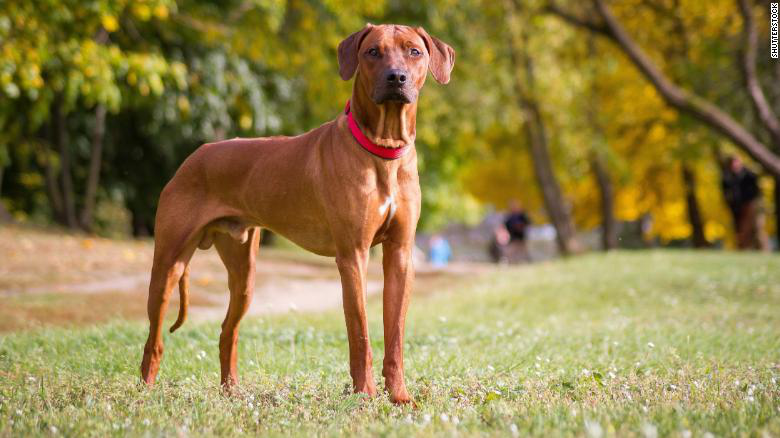

In [3]:
'''
Meload data gambar anjing dengan perintah Image.open dari library PIL

'''

img = Image.open('dog.jpg')
img

#4. DATA PREPROCESSING

###4.1 Convert image ke greyscale

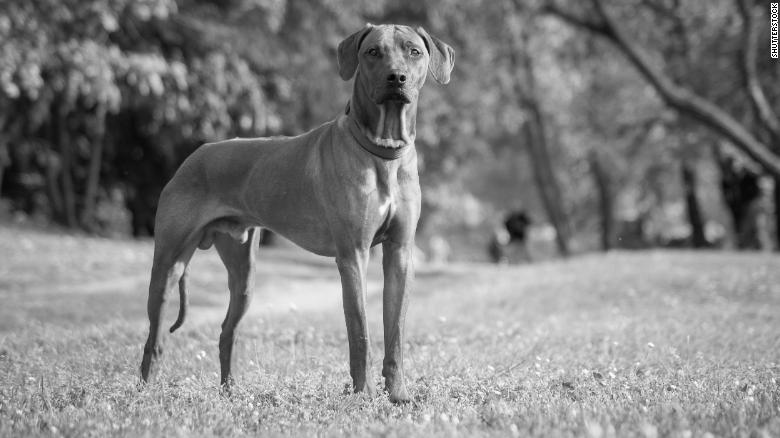

In [4]:
'''
Convert img ke grayscale dengan menggunakan perintah ImageOps dari library PIL

'''

g = ImageOps.grayscale(img)
g

###4.2 Data Transformation

In [5]:
''' 
Data Transformation: Transformasi gambar ke array menggunakan numpy

'''

dog = np.array(g)
dog

array([[ 85,  85,  83, ...,  40,  38,  51],
       [ 76,  76,  75, ...,  38,  56,  29],
       [ 64,  65,  65, ...,  48,  36,  60],
       ...,
       [150, 144, 134, ..., 136, 135, 131],
       [149, 142, 132, ..., 141, 139, 134],
       [149, 142, 131, ..., 146, 143, 136]], dtype=uint8)

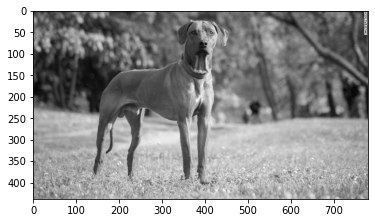

In [6]:
'''
Menampilkan gambar dog hasil transform ke array

'''

plt.imshow(dog, cmap='gray')

#5. IMAGE PROCESSING

##Image Data Exploration

###5.1 Hitung vektor gradient masing-masing pixel untuk sumbu x dan sumbu y

In [8]:
'''
Menghitung vektor gradient masing-masing pixel untuk sumbu x dan sumbu y

'''

dog_dx, dog_dy = np.gradient(dog)

In [9]:
'''
Menampilkan nilai parsial derivatif pada sumbu x

'''

dog_dx

array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  18. , -22. ],
       [-10.5, -10. ,  -9. , ...,   4. ,  -1. ,   4.5],
       [ -9. ,  -9. ,  -8. , ..., 107.5, -14. ,  20. ],
       ...,
       [ -0.5,  -2. ,  -2.5, ...,   2. ,   1.5,   1. ],
       [ -0.5,  -1. ,  -1.5, ...,   5. ,   4. ,   2.5],
       [  0. ,   0. ,  -1. , ...,   5. ,   4. ,   2. ]])

In [10]:
'''
Menampilkan nilai parsial derivatif pada sumbu y

'''

dog_dy

array([[  0. ,  -1. ,  -2.5, ...,  -1.5,   5.5,  13. ],
       [  0. ,  -0.5,  -1. , ...,   6. ,  -4.5, -27. ],
       [  1. ,   0.5,   0.5, ...,  -3. ,   6. ,  24. ],
       ...,
       [ -6. ,  -8. ,  -9.5, ...,   1. ,  -2.5,  -4. ],
       [ -7. ,  -8.5,  -8.5, ...,   0.5,  -3.5,  -5. ],
       [ -7. ,  -9. ,  -9. , ...,  -0.5,  -5. ,  -7. ]])

Text(0.5, 1.0, 'Visualisasi gambar nilai parsial derivatif pada sumbu y')

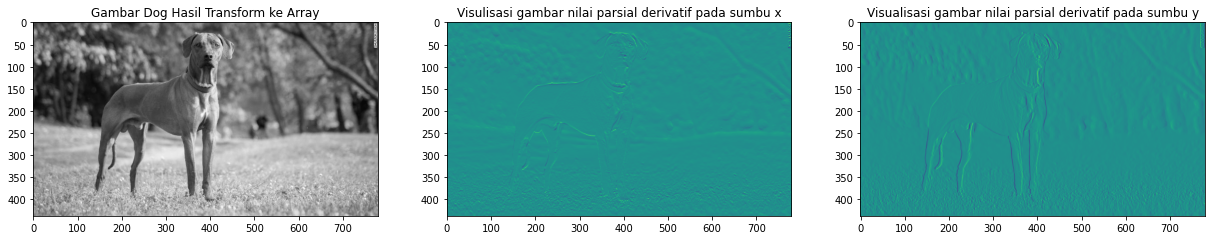

In [11]:
'''
Memvisualisasikan nilai gradient masing-masing pixel untuk 
sumbu x dan sumbu y dengan menggunakan matplotlib

'''

fig, ax = plt.subplots(ncols=3,figsize=(21,5))
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('Gambar Dog Hasil Transform ke Array')
ax[1].imshow(dog_dx)
ax[1].set_title('Visulisasi gambar nilai parsial derivatif pada sumbu x')
ax[2].imshow(dog_dy)
ax[2].set_title('Visualisasi gambar nilai parsial derivatif pada sumbu y')

###5.2 Hitung gradient magnitude tiap pixel

In [12]:
'''
Menghitung nilai gradient magnitude tiap pixel menggunakan perintah np.sqrt 
dari library numpy

'''

mag = np.sqrt((dog_dx**2) + (dog_dy**2))
mag

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

###5.3 Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi (Biasanya threshold ~ 30)

Saya memilih nilai threshold = 25 karena menghasilkan edge yang paling jelas, saya sudah mencoba diatas 25 namun makin sedikit informasi deteksi edge-nya dan dibawah 25 menghasilkan edge yang terlalu ramai dan kurang jelas struktur anjingnya.

In [13]:
'''
Mendeteksi edge dari nilai magnitude dengan nilai threshold = 25
menggunakan perintah np.where dari library numpy

Nilai magnitude diatas threshold, akan diubah kedalam nilai 255 (putih),
sedangkan nilai magnitude yang kurang atau sama dengan threshold akan diubah 
menjadi 0 (hitam)

'''

threshold = 25

edge = np.where(mag > threshold, 255, 0)
edge

array([[  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ..., 255,   0, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

Text(0.5, 1.0, 'Visualisasi Deteksi Edge')

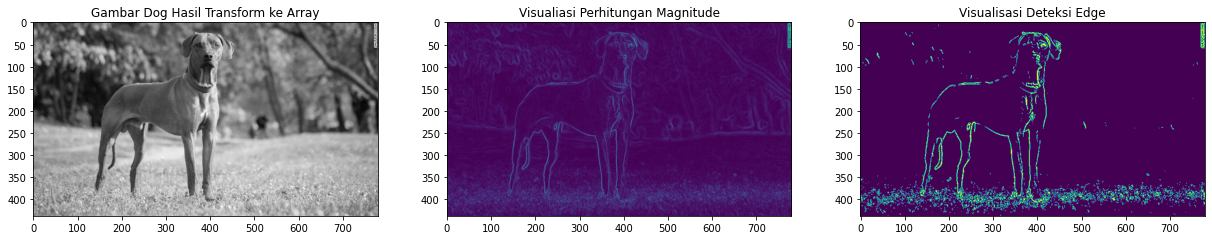

In [14]:
'''
Memvisualisasikan deteksi edge dari nilai magnitude dengan nilai threshold = 25
menggunakan perintah dari library matplotlib

'''

fig, ax = plt.subplots(ncols=3,figsize=(21,5))
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('Gambar Dog Hasil Transform ke Array')
ax[1].imshow(mag)
ax[1].set_title('Visualiasi Perhitungan Magnitude')
ax[2].imshow(edge)
ax[2].set_title('Visualisasi Deteksi Edge')

Text(0.5, 1.0, 'Visualisasi Deteksi Edge')

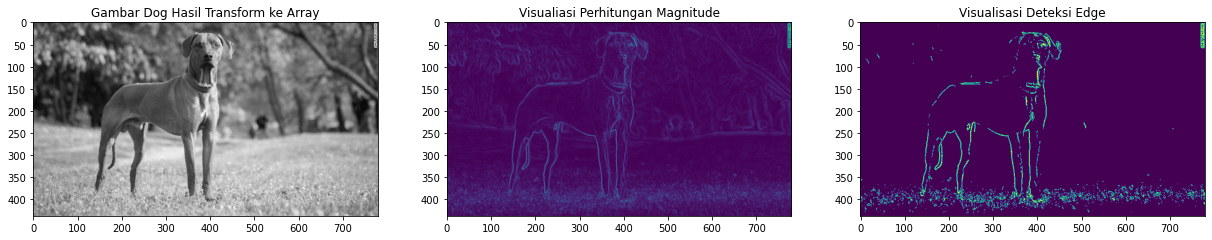

In [18]:
'''
Mendeteksi edge dari nilai magnitude dengan nilai threshold = 30
menggunakan perintah np.where dari library numpy.

Memvisualisasikan deteksi edge dari nilai magnitude dengan nilai threshold = 30
menggunakan perintah dari library matplotlib

Nilai magnitude diatas threshold, akan diubah kedalam nilai 255 (putih),
sedangkan nilai magnitude yang kurang atau sama dengan threshold akan diubah 
menjadi 0 (hitam)

'''
threshold = 30

edge2 = np.where(mag > threshold, 255, 0)

fig, ax = plt.subplots(ncols=3,figsize=(21,5))
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('Gambar Dog Hasil Transform ke Array')
ax[1].imshow(mag)
ax[1].set_title('Visualiasi Perhitungan Magnitude')
ax[2].imshow(edge2)
ax[2].set_title('Visualisasi Deteksi Edge')

Text(0.5, 1.0, 'Visualisasi Deteksi Edge')

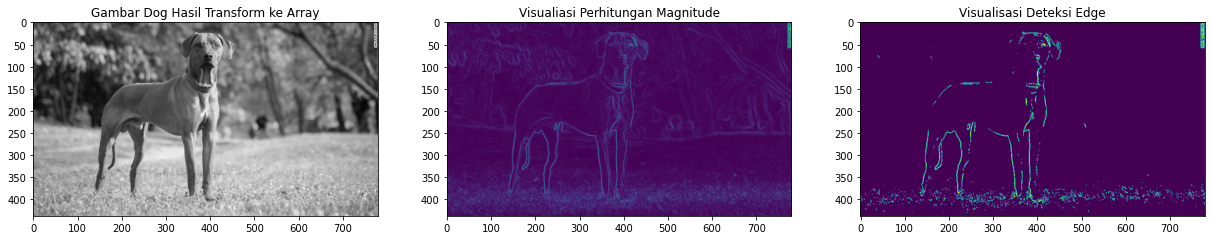

In [19]:
'''
Mendeteksi edge dari nilai magnitude dengan nilai threshold = 35
menggunakan perintah np.where dari library numpy

Memvisualisasikan deteksi edge dari nilai magnitude dengan nilai threshold = 35
menggunakan perintah dari library matplotlib

Nilai magnitude diatas threshold, akan diubah kedalam nilai 255 (putih),
sedangkan nilai magnitude yang kurang atau sama dengan threshold akan diubah 
menjadi 0 (hitam)

'''
threshold = 35

edge3 = np.where(mag > threshold, 255, 0)

fig, ax = plt.subplots(ncols=3,figsize=(21,5))
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('Gambar Dog Hasil Transform ke Array')
ax[1].imshow(mag)
ax[1].set_title('Visualiasi Perhitungan Magnitude')
ax[2].imshow(edge3)
ax[2].set_title('Visualisasi Deteksi Edge')

###5.4 Untuk operasi matriks, buat matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan sesuai dengan aturan perkalian matriks.

In [23]:
'''
Saya membuat matrix_rugaya berukuran 780 baris dan 300 kolom dengan random value
menggunakan perintah np.random.ran dari library numpy. matrix_rugaya akan 
dikalikan dengan nilai edge detection terbaik (threshold = 25).

Ukuran matrix edge detection sebesar 438 baris, 780 kolom.

'''

matrix_rugaya = np.random.rand(780,300)

edge.dot(matrix_rugaya)

array([[  68.42903306,  202.86567184,  197.25611673, ...,  177.75662765,
         189.00513491,  137.00374835],
       [  68.42903306,  202.86567184,  197.25611673, ...,  177.75662765,
         189.00513491,  137.00374835],
       [ 821.17566614,  895.06677643,  639.77392723, ...,  913.66059855,
        1148.46442665,  955.9944447 ],
       ...,
       [  30.776307  ,  155.43512613,  149.16205365, ...,  203.17737735,
         221.43627708,  237.44955948],
       [  30.776307  ,  155.43512613,  149.16205365, ...,  203.17737735,
         221.43627708,  237.44955948],
       [ 208.28039525,  224.67330334,  342.62161454, ...,  236.09012907,
         363.8723796 ,  403.44136993]])

#6. HASIL DAN KESIMPULAN

In [ ]:
'''
Deteksi edge pada gambar anjing dengan hasil edge yang baik adalah dengan 
menggunakan nilai threshold = 25 karena menghasilkan informasi edge yang 
sangat bersih dan struktur anjing yang sangat jelas.

Pengambilan informasi edge pada gambar anjing tidak terlepas dari perhitungan
parsial derivatif pada sumbu x dan sumbu y dan perhitungan gradient magnitude.

Saya membuat matrix_rugaya berukuran 780 baris dan 300 kolom dengan random value
menggunakan perintah np.random.ran dari library numpy. matrix_rugaya akan 
dikalikan dengan nilai edge detection terbaik (threshold = 25).

'''